# Predicting Housing Sale Prices in Ames, Iowa

----




### Project Description
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, our goal is to predict the final price of each home of the test data set using the training data set.


### Datasets

80 Columns x 1460 Rows of housing sales data from years 2006 to 2010

Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


----

### Contents
* Data Observation
* Data Munging/Cleaning
* Data Analysis
* Predictive Model Construction
* Conclusion

In [1]:
# Dependencies and Setup
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Importing Data
data = pd.read_csv("data.csv")
#data.info()

## One-way plots

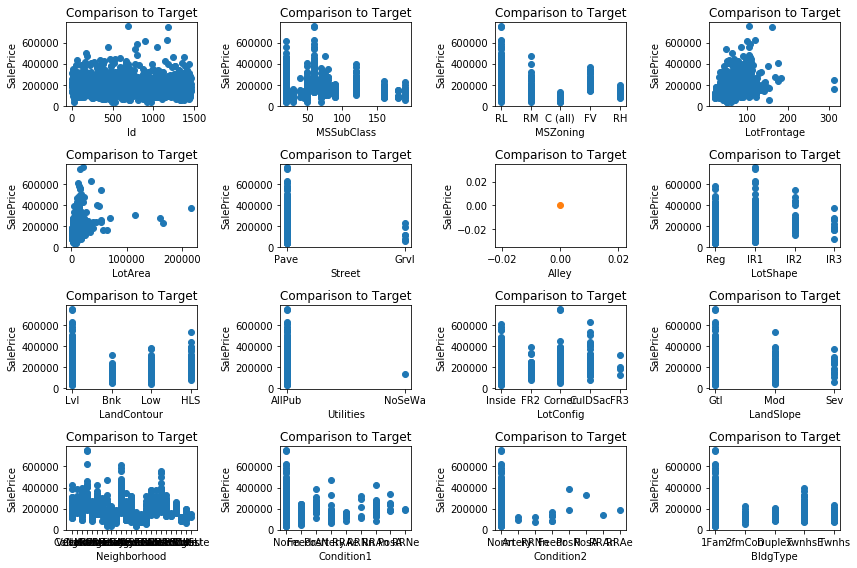

In [3]:
# Plot oneway graphs field versus target
j = 0 #select the starting field for the 9 plots
fig = plt.figure(figsize=(12,8))
target = "SalePrice"

# loop plotting
for i in range(16):
    field1 = data.columns[j]
    oneway = data[[field1,target]]
    plt.subplot(4,4,i+1)
    try:
        plt.scatter(oneway[field1],oneway[target])
    except:
        plt.scatter(0,0)
    plt.title("Comparison to Target")
    plt.xlabel(oneway.columns[0])
    plt.ylabel(oneway.columns[1])
    j=j+1

plt.tight_layout()
#Code to save to file
#plt.savefig("Images/Group9.png")
plt.show()

In [33]:
data1 = data.copy()
data1.fillna(0, inplace=True)
obj_list = data1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
le = LabelEncoder()

# Transforming labels and converting categorical data into dummy/indicator variables 
for i in obj_list.index:
    data1[i] = data1[i].astype(str)
    le.fit(data1[i])
    data1[i] = le.transform(data1[i])

In [55]:
import statsmodels.api as sm
#import statsmodels.formula.api as smf
i=5
model = sm.GLM(data1["SalePrice"], data1[data1.columns[i]]).fit()
print(model.deviance)
print(data1.columns[i])
print(model.summary())


9294103390736.344
Street
                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1459
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                      6.3702e+09
Method:                          IRLS   Log-Likelihood:                -18551.
Date:                Thu, 06 Feb 2020   Deviance:                   9.2941e+12
Time:                        14:27:01   Pearson chi2:                 9.29e+12
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Street      1.811e+05   2093.119     86.536      0.000    1.77e+05    1.85e+05


In [54]:
i=17
model = sm.GLM(data1["SalePrice"], data1[data1.columns[i]]).fit()
print(model.deviance)
print(data1.columns[i])
print(model.summary())

4107324910191.4424
OverallQual
                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1459
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                      2.8152e+09
Method:                          IRLS   Log-Likelihood:                -17955.
Date:                Thu, 06 Feb 2020   Deviance:                   4.1073e+12
Time:                        14:26:44   Pearson chi2:                 4.11e+12
No. Iterations:                     3   Covariance Type:             nonrobust
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
OverallQual  3.043e+04    222.032    137.068      0.000       3e+04    3.09e+04


In [57]:
# Ordinary least squares - Single variable
import statsmodels.api as sm
#import statsmodels.formula.api as smf

#Initializing variables
dev_comp = pd.DataFrame()
fields = []
dev = []

# Calculating Deviance
for i in range(80): 
    # Deviance of Sales Price
    form1 = "SalePrice ~ " + data1.columns[i]
    fields.append(data1.columns[i])
    model = sm.GLM(data1["SalePrice"], data1[data1.columns[i]]).fit()
    dev.append(model.deviance)
        
# Output deviance measures and rank by decending
dev_comp["Fields"] = fields
dev_comp["Deviation"] = dev
dev_comp = dev_comp.sort_values(by="Deviation", ascending=True)
print(dev_comp.head(15))

          Fields     Deviation
17   OverallQual  4.107325e+12
46     GrLivArea  4.638169e+12
43      1stFlrSF  6.018164e+12
61    GarageCars  6.244985e+12
54  TotRmsAbvGrd  6.595085e+12
38   TotalBsmtSF  6.603424e+12
49      FullBath  6.789312e+12
62    GarageArea  6.889724e+12
19     YearBuilt  8.882602e+12
20  YearRemodAdd  8.991631e+12
77        YrSold  9.208735e+12
5         Street  9.294103e+12
59   GarageYrBlt  9.318008e+12
42    Electrical  9.396990e+12
64    GarageCond  9.445553e+12


### Selected Fields

In [61]:
# Select data for analysis
cols = ["OverallQual",
        "GrLivArea",
        "1stFlrSF",
        "GarageCars",
        "TotRmsAbvGrd",
        "TotalBsmtSF",
        "FullBath",
        "GarageArea",
        "YearBuilt",
        "YearRemodAdd",
        "YrSold",
        "SalePrice"]
sel_data = data[cols].copy()
sel_data.describe()

,OverallQual,GrLivArea,1stFlrSF,GarageCars,TotRmsAbvGrd,TotalBsmtSF,FullBath,GarageArea,YearBuilt,YearRemodAdd,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1162.626712,1.767123,6.517808,1057.429452,1.565068,472.980137,1971.267808,1984.865753,2007.815753,180921.195890
std,1.382997,525.480383,386.587738,0.747315,1.625393,438.705324,0.550916,213.804841,30.202904,20.645407,1.328095,79442.502883
min,1.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000,34900.000000
25%,5.000000,1129.500000,882.000000,1.000000,5.000000,795.750000,1.000000,334.500000,1954.000000,1967.000000,2007.000000,129975.000000
50%,6.000000,1464.000000,1087.000000,2.000000,6.000000,991.500000,2.000000,480.000000,1973.000000,1994.000000,2008.000000,163000.000000
75%,7.000000,1776.750000,1391.250000,2.000000,7.000000,1298.250000,2.000000,576.000000,2000.000000,2004.000000,2009.000000,214000.000000
max,10.000000,5642.000000,4692.000000,4.000000,14.000000,6110.000000,3.000000,1418.000000,2010.000000,2010.000000,2010.000000,755000.000000


In [62]:
#Check for na's
sel_data.isnull().any().any()

False

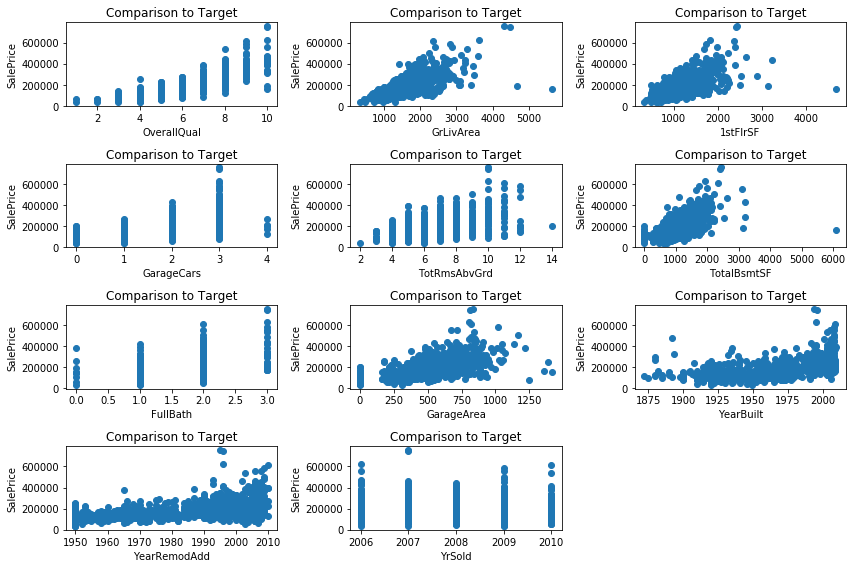

In [63]:
# Plot oneway graphs field versus target
j = 0 #select the starting field for the 9 plots
fig = plt.figure(figsize=(12,8))
target = "SalePrice"

# loop plotting
for i in range(11):
    field1 = sel_data.columns[j]
    oneway = sel_data[[field1,target]]
    plt.subplot(4,3,i+1)
    try:
        plt.scatter(oneway[field1],oneway[target])
    except:
        plt.scatter(0,0)
    plt.title("Comparison to Target")
    plt.xlabel(oneway.columns[0])
    plt.ylabel(oneway.columns[1])
    j=j+1

plt.tight_layout()
#Code to save to file
#plt.savefig("Images/Group9.png")
plt.show()

### Histograms - Sales Price vs. Frequency 

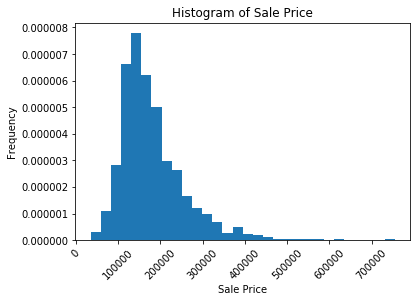

In [64]:
# Plot Histogram of Sales Price vs. Frequency
target = "SalePrice"
plt.hist(sel_data[target], density=True, bins=30)
plt.xticks(rotation = 45)
plt.title("Histogram of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
#plt.savefig("histsp.png")
plt.show()

### Model Setup

In [65]:
# Select columns, add constant, split dependent (y) and independent variabless (X)
#import statsmodels.api as sm
cols = ["OverallQual",
        "GrLivArea",
        "1stFlrSF",
        "GarageCars",
        "TotRmsAbvGrd",
        "TotalBsmtSF",
        "FullBath",
        "GarageArea",
        "YearBuilt",
        "YearRemodAdd",
        "YrSold"]
X = data[cols].copy()
X_scaled = (X - X.min()) / (X.max() - X.min())
X_scaled = sm.add_constant(X_scaled)
y = sel_data["SalePrice"]
#X_scaled.describe()

C:\Users\mryet\Anaconda3\envs\PythonData\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [66]:
# split into traingin and testing models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)
#X_train.describe()

### Models

In [67]:
ols = sm.OLS(y_train, X_train).fit()
print(ols.summary())

print("")
print("")

glm = sm.GLM(y_train, X_train, family=sm.families.Gaussian(sm.families.links.log)).fit()
print(glm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     268.5
Date:                Thu, 06 Feb 2020   Prob (F-statistic):          1.12e-290
Time:                        14:35:05   Log-Likelihood:                -12252.
No. Observations:                1022   AIC:                         2.453e+04
Df Residuals:                    1010   BIC:                         2.459e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.331e+04   6259.659    -10.115   

37769.66958351118 : 181438.53424657535


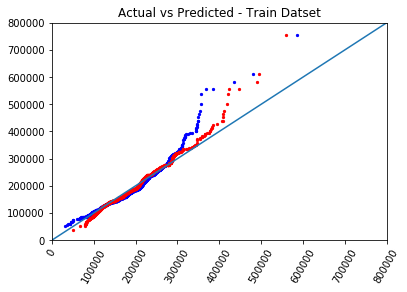

In [82]:
#print Q-Q - Train Dataset
pred_ols = ols.predict(X_train)
pred_glm = glm.predict(X_train)
from sklearn.metrics import mean_squared_error
print(str(np.sqrt(mean_squared_error(y_train,pred_glm))) + " : " + str(np.mean(y_train)))
min = 0
max = 800000
plt.scatter(np.sort(pred_ols), np.sort(y_train), s = 5, color="blue", label="OLS")
plt.scatter(np.sort(pred_glm), np.sort(y_train), s = 5, color="red", label="GLM")
plt.plot([0,max],[0,max])
plt.title("Actual vs Predicted - Train Datset")
plt.xticks(rotation = 60)
plt.xlim(min,max)
plt.ylim(min,max)
plt.show()

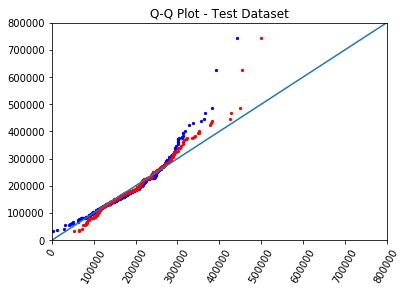

In [80]:
#print Q-Q
pred_ols = ols.predict(X_test)
pred_glm = glm.predict(X_test)
min = 0
max = 800000
plt.scatter(np.sort(pred_ols), np.sort(y_test), s = 5, color="blue", label="OLS")
plt.scatter(np.sort(pred_glm), np.sort(y_test), s = 5, color="red", label="GLM")
plt.plot([0,max],[0,max])
plt.title("Q-Q Plot - Test Dataset")
plt.xticks(rotation = 60)
plt.xlim(min,max)
plt.ylim(min,max)
plt.show()

In [78]:
from sklearn.metrics import mean_squared_error
print(str(np.sqrt(mean_squared_error(y_test,pred_glm))) + " : " + str(np.mean(y_test)))

34489.65522307999 : 179714.07305936073
